In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
def perform_eda(file_path):
   
    df = pd.read_csv(file_path)
    
   
   
    df.drop_duplicates(inplace=True)
    
  
    df.dropna(inplace=True)
    
    df = df[~df["body"].isin(["[deleted]", "[removed]"])]
    
    df = df[df["body"].str.len() > 2]

   
    # display descriptive statistics
    print(df.describe())
    
    # Convert 'created_utc' to datetime and set as index
    df['created_utc'] = pd.to_datetime(df['created_utc'])
    df.set_index('created_utc', inplace=True)
    
    # find and print the date range
    earliest_date = df.index.min()
    latest_date = df.index.max()
    print(f"Data covers from {earliest_date} to {latest_date}")
    
    # resample and count posts per month
    monthly_posts = df.resample('M').size()
    
    # Plotting monthly posts
    plt.figure(figsize=(10, 6))
    monthly_posts.plot(title=f'Monthly Posts for {file_path}')
    plt.xlabel('Month')
    plt.ylabel('Number of Posts')
    plt.show()
    
    # word cloud
    text = ' '.join(title for title in df['title'])
    wordcloud = WordCloud(background_color='white', max_words=100, contour_color='steelblue').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
  

    return df, monthly_posts




       num_comments         score  upvote_ratio
count  13667.000000  13667.000000  13667.000000
mean       7.248189     16.743031      0.927972
std       13.287134     38.746660      0.116166
min        0.000000      0.000000      0.130000
25%        1.000000      2.000000      0.880000
50%        3.000000      5.000000      1.000000
75%        7.000000     11.000000      1.000000
max      282.000000    896.000000      1.000000
Data covers from 2019-07-07 16:21:24+00:00 to 2021-12-23 17:08:28+00:00


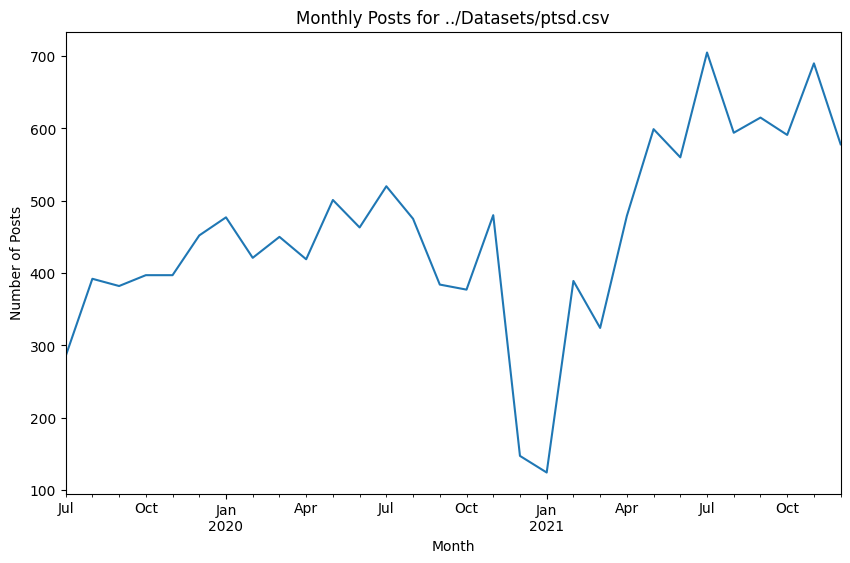

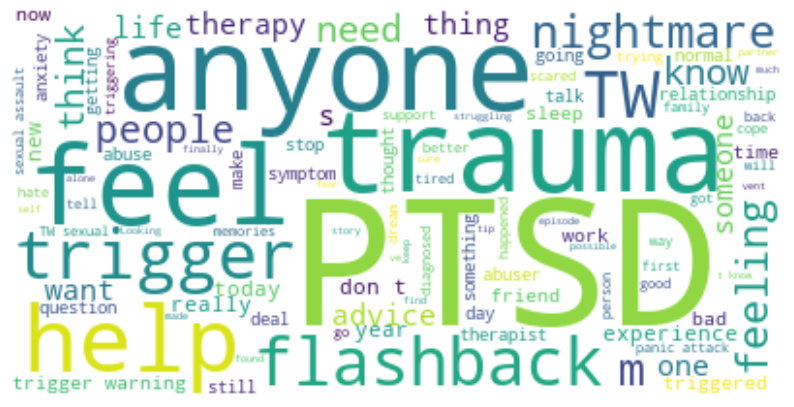

In [3]:
cleaned_ptsd_df, monthly_posts = perform_eda("../Datasets/ptsd.csv")


       num_comments         score  upvote_ratio
count  13450.000000  13450.000000  13450.000000
mean      16.475465     38.510855      0.891527
std       30.315505    103.032805      0.129865
min        0.000000      0.000000      0.080000
25%        3.000000      3.000000      0.830000
50%        7.000000      8.000000      0.930000
75%       16.000000     24.000000      1.000000
max      560.000000   2380.000000      1.000000
Data covers from 2021-01-11 22:23:19+00:00 to 2021-12-23 17:56:36+00:00


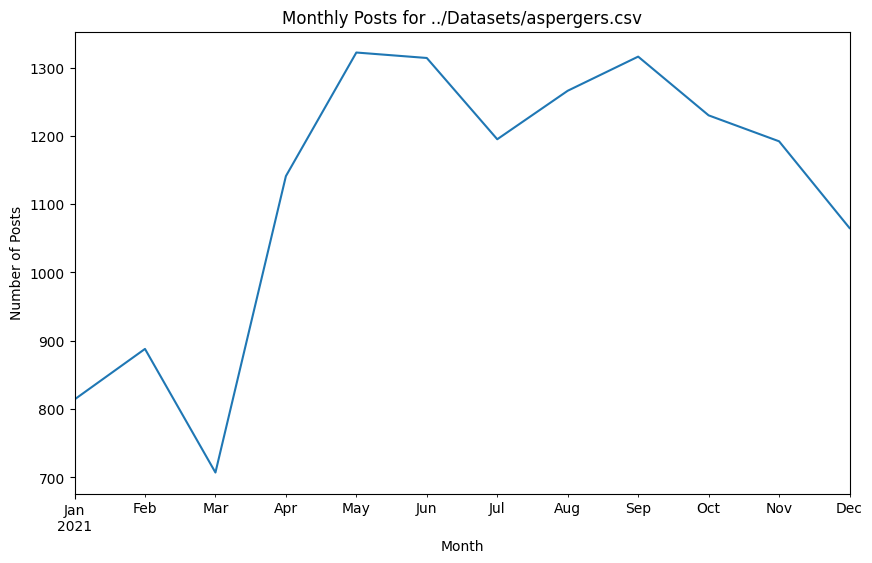

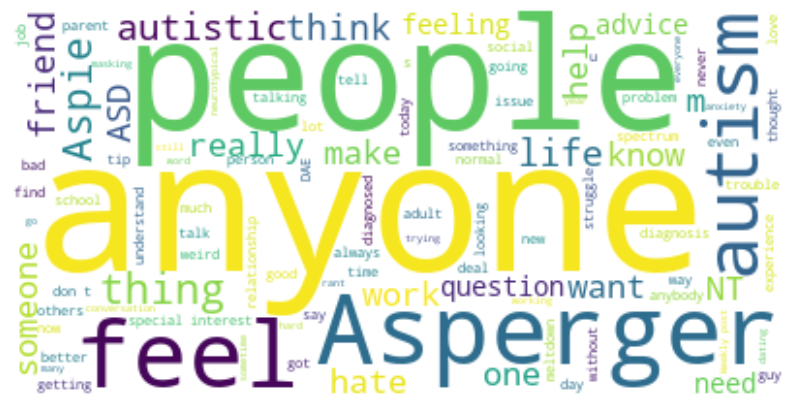

In [4]:
cleaned_apg_df, monthly_posts = perform_eda("../Datasets/aspergers.csv")

       num_comments         score  upvote_ratio
count  13866.000000  13866.000000  13866.000000
mean       3.155777      9.974109      0.945280
std        9.738949     59.679474      0.115211
min        0.000000      0.000000      0.200000
25%        0.000000      1.000000      0.980000
50%        1.000000      2.000000      1.000000
75%        3.000000      4.000000      1.000000
max      362.000000   2495.000000      1.000000
Data covers from 2021-11-06 21:22:53+00:00 to 2021-12-23 18:01:41+00:00


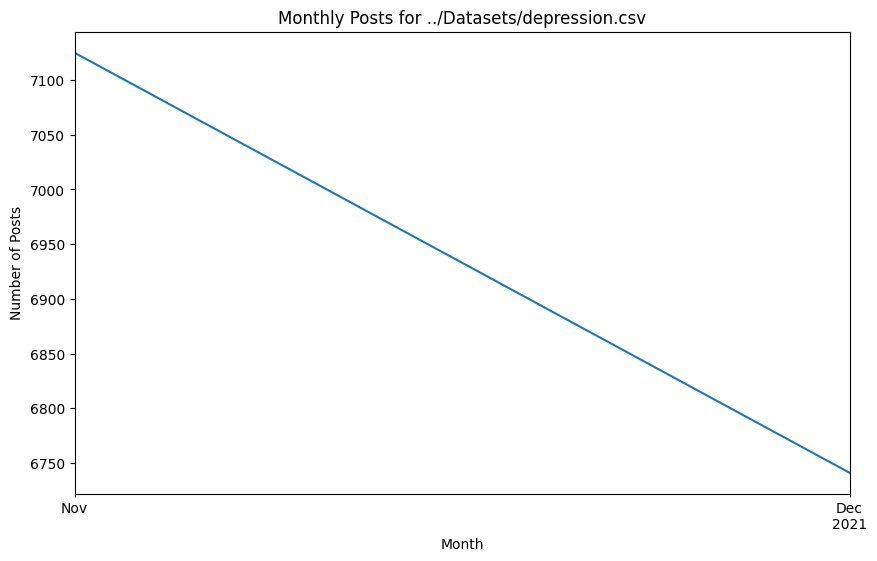

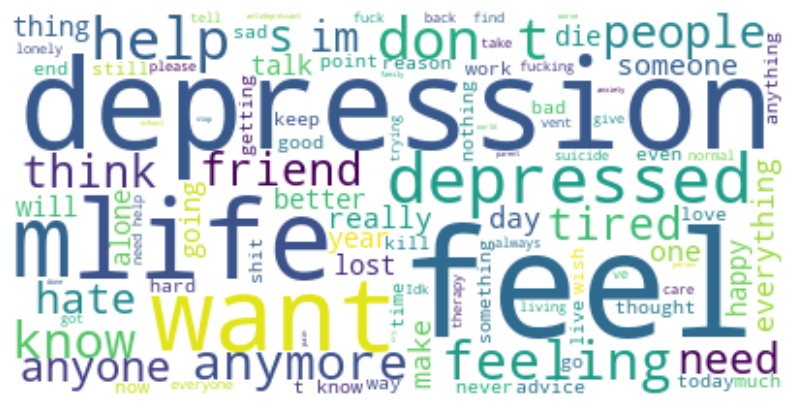

In [5]:
cleaned_dps_df, monthly_posts = perform_eda("../Datasets/depression.csv")

       num_comments         score  upvote_ratio
count  25518.000000  25518.000000  25518.000000
mean       4.805667     10.808841      0.957697
std       11.015434     42.820736      0.098551
min        0.000000      0.000000      0.170000
25%        1.000000      1.000000      0.990000
50%        2.000000      3.000000      1.000000
75%        5.000000      6.000000      1.000000
max      466.000000   1054.000000      1.000000
Data covers from 2021-02-16 02:32:47+00:00 to 2021-12-22 18:26:02+00:00


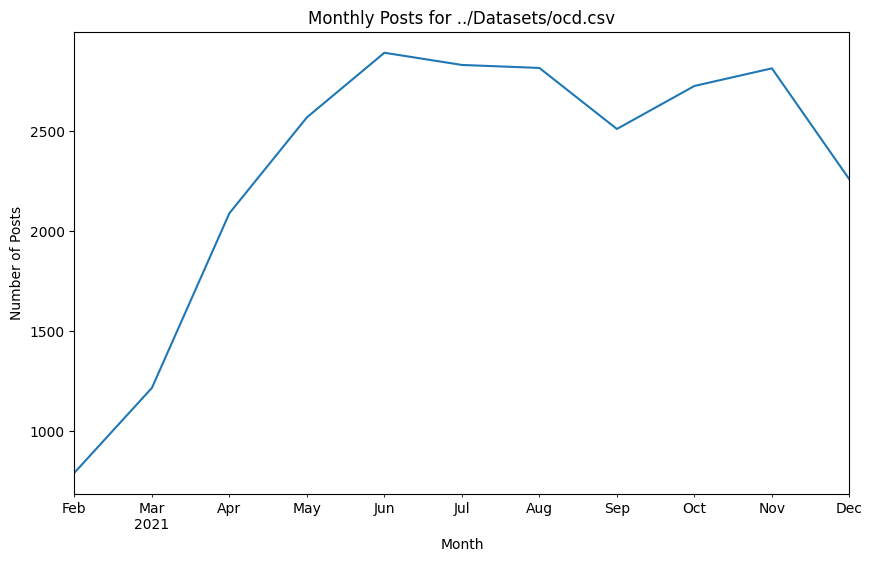

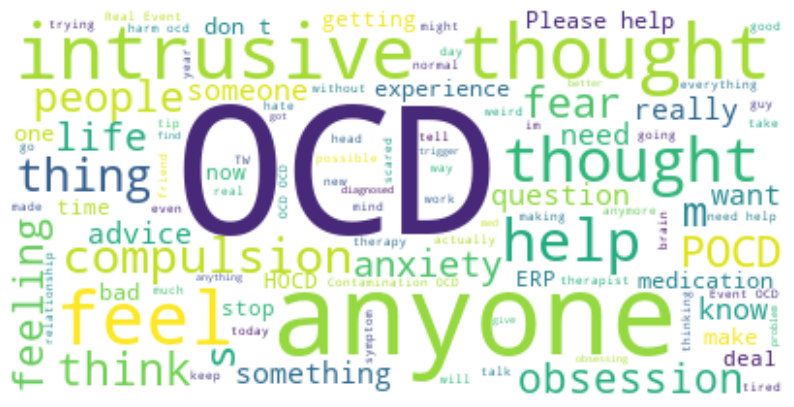

In [6]:
cleaned_ocd_df, monthly_posts = perform_eda("../Datasets/ocd.csv")

       num_comments         score  upvote_ratio
count  20398.000000  20398.000000  20398.000000
mean      13.975782     40.788901      0.943061
std       65.218590    251.436089      0.119432
min        0.000000      0.000000      0.170000
25%        2.000000      1.000000      0.960000
50%        4.000000      3.000000      1.000000
75%        7.000000      6.000000      1.000000
max     2944.000000   6055.000000      1.000000
Data covers from 2021-10-01 20:28:11+00:00 to 2021-12-22 18:32:56+00:00


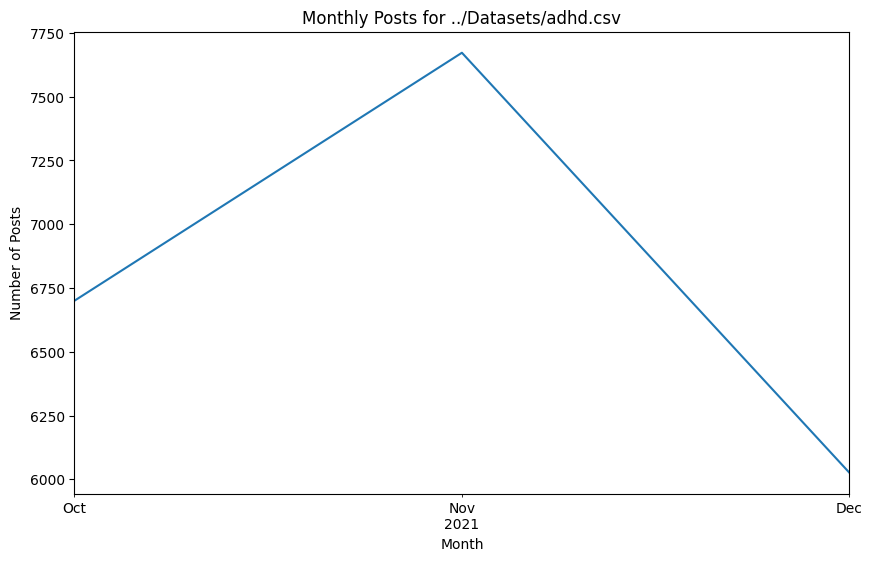

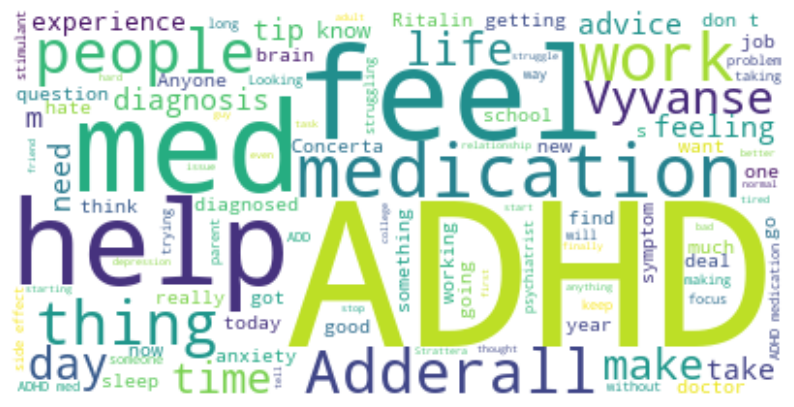

In [7]:
cleaned_adhd_df, monthly_posts = perform_eda("../Datasets/adhd.csv")

In [8]:
cleaned_ptsd_df.head(1)

,author,body,id,num_comments,score,subreddit,title,upvote_ratio,url
created_utc,,,,,,,,,
2021-12-23 17:08:28+00:00,ChanceIntroduction95,This year felt like literal hell. It’s over no...,rn07cg,3,5,ptsd,How to deal with feeling shameful about how my...,1.0,https://www.reddit.com/r/ptsd/comments/rn07cg/...


In [9]:
cleaned_ptsd_df.shape


(13667, 9)

## Randomly sampling a subset of each data

In [10]:

sampled_ptsd_df = cleaned_ptsd_df.sample(n=10000, random_state=1)


In [11]:
sampled_apg_df = cleaned_apg_df.sample(n=10000, random_state=1)
sampled_dps_df = cleaned_dps_df.sample(n=10000, random_state=1)
sampled_ocd_df = cleaned_ocd_df.sample(n=10000, random_state=1)
sampled_adhd_df = cleaned_adhd_df.sample(n=10000, random_state=1)

Based on the comparisons of the descriptive statistics between the original datasets and their respective sampled subsets, it's clear that the sampled datasets maintain the key characteristics and diversity of the original datasets. This ensures that the samples are representative and suitable for conducting my engagement analysis.

### Save all sampled datasets to the designed folder 

In [12]:

folder_path = '../Engagement Analysis Datasets'


# Define a list of tuples containing DataFrame objects and their intended file names
datasets = [
    (sampled_ptsd_df, 'sampled_ptsd.csv'),
    (sampled_apg_df, 'sampled_apg.csv'),
    (sampled_dps_df, 'sampled_dps.csv'),
    (sampled_ocd_df, 'sampled_ocd.csv'),
    (sampled_adhd_df, 'sampled_adhd.csv')
]

# Loop through the datasets and save each one
for df, filename in datasets:
    df.to_csv(os.path.join(folder_path, filename))

# Combine the DataFrames
combined_df = pd.concat([df for df, _ in datasets])

# Save the combined DataFrame to a CSV file
combined_file_path = os.path.join(folder_path, 'combined_sampled_datasets.csv')
combined_df.to_csv(combined_file_path)





In [13]:
combined_df.shape

(50000, 9)

### Explore various aspects of engagement

#### Engagement Over Time Analysis

Analyzing how engagement metrics like comments and scores vary over time across different subreddits.

In [14]:
## Resample data by Time period. 
## Thses five subreddit each with its own unique time range, so the resample approach will be based on the time spans


# PTSD: monthly resampling 
monthly_ptsd = sampled_ptsd_df.resample('M').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})

# Asperger,depression, OCD, ADHD: weekly resampling
weekly_apg = sampled_apg_df.resample('W').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})
weekly_ocd = sampled_ocd_df.resample('W').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})
weekly_adhd = sampled_adhd_df.resample('W').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})
weekly_dps = sampled_dps_df.resample('W').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})



In [15]:


# Define the base path where the files will be saved
base_path = "../Engagement Analysis Datasets/Engagement 1"

# Check if the base path exists, if not, create it
if not os.path.exists(base_path):
    os.makedirs(base_path)

# Save each resampled dataset to a CSV file within the specified path
monthly_ptsd.to_csv(os.path.join(base_path, 'monthly_ptsd.csv'))
weekly_apg.to_csv(os.path.join(base_path, 'weekly_apg.csv'))
weekly_ocd.to_csv(os.path.join(base_path, 'weekly_ocd.csv'))
weekly_adhd.to_csv(os.path.join(base_path, 'weekly_adhd.csv'))
weekly_dps.to_csv(os.path.join(base_path, 'weekly_dps.csv'))




#### Interactive Scatter Plot and Bubble Chart for Community Interaction Analysis

Investigating the relationship between upvote ratios, comments, and scores to understand how different communities engage with content.

we use the combined_df and create interactive scatter plots. 

#### Comparative Analysis

Compare engagement across different mental health conditions by aggregating metrics like num_comments, score, and upvote_ratio by subreddit.

In [16]:
## prepare data for comparative analysis

# calculating average engagement metrics by subreddit
avg_engagement_by_subreddit = combined_df.groupby('subreddit').agg({
    'num_comments': 'mean',
    'score': 'mean',
    'upvote_ratio': 'mean'
}).reset_index()


In [17]:
avg_engagement_by_subreddit.head()

,subreddit,num_comments,score,upvote_ratio
0,ADHD,14.0514,39.5103,0.942182
1,OCD,4.9848,10.9051,0.957888
2,aspergers,16.6557,38.9409,0.891568
3,depression,3.0997,10.1181,0.943703
4,ptsd,7.2039,16.6431,0.926525


#### Summary

Engagement Over Time Analysis: Line Chart


Community Interaction Analysis: Scatter Plots/Bubble Charts

Comparative Analysis: Bar Chart
 
 
